In [120]:
%matplotlib inline
import pandas as pd
from pandas import set_option
#Limit dataframe exibition to 8 rows
set_option("display.max_rows", 8)
import matplotlib.pyplot as plt
from pylab import plot
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [7]:
data = pd.read_csv('Subscribers/Subscribers.txt', sep='\t', lineterminator='\r')

/home/guilherme/ENV/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Converte as colunas de data para o tipo de dados datetime

In [13]:
data['stop_date'] = pd.to_datetime(data['stop_date'])
data['start_date'] = pd.to_datetime(data['start_date'])

In [25]:
data

,customer_id,rate_plan,monthly_fee,market,channel,start_date,stop_date,stop_type,tenure,censored
0,2,Top,150.0,Gotham,Dealer,2001-09-16,NaT,NaN,1929.0,1.0
1,52,Bottom,25.0,Metropolis,Mail,1997-01-13,2004-12-17,V,2895.0,0.0
2,76,Bottom,25.0,Gotham,Dealer,2000-12-08,2004-10-23,V,1415.0,0.0
3,89,Bottom,25.0,Gotham,Dealer,1999-09-16,2004-03-18,V,1645.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5068032,\n115985520,Bottom,40.0,Smallville,Chain,2006-12-28,NaT,NaN,0.0,1.0
5068033,\n115985521,Bottom,40.0,Smallville,Chain,2006-12-28,NaT,NaN,0.0,1.0
5068034,\n115985522,Bottom,40.0,Smallville,Chain,2006-12-28,NaT,NaN,0.0,1.0
5068035,\n,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN


#### Histogram

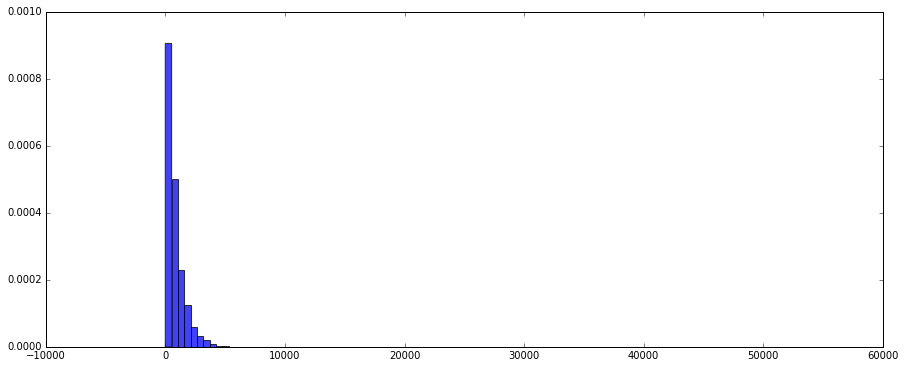

In [127]:
n, bins, patches = plt.hist(data['tenure'].fillna(0), 100, normed=1, alpha=0.75)

In [112]:
data.ix[data['censored']==1, 'stop_date'].unique()

array(['NaT'], dtype='datetime64[ns]')

#### Above we can observe that censored==1 means an individual is alive

In [14]:
data['stop_date'][1]-data['start_date'][1]

Timedelta('2895 days 00:00:00')

In [19]:
data['stop_date'][2]-data['start_date'][2]

1415.0


#### As we can see above, tenure columns holds timedelta between start and stop date

### Curva de Sobrevivência

#### Array of durations

In [113]:
T = data['tenure']

#### Array of death or alive

In [114]:
E = data['censored']

In [115]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E) 

<lifelines.KaplanMeierFitter: fitted with 5068036 observations, -9223372036852098731 censored>

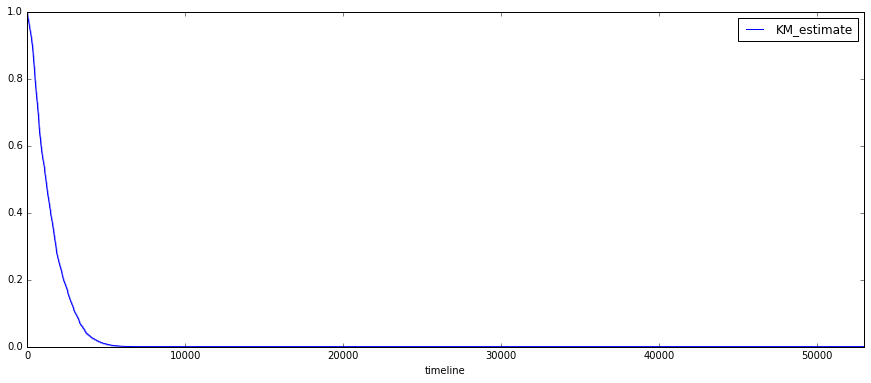

In [121]:
kmf.survival_function_
kmf.median_
kmf.plot()

# P4. Tempo de vida médio de um cliente, com base na curva de sobrevivência: 

In [128]:
kmf.median_

1178.0